# Script to evaluate the ML-Models

Setup (load automl-models.pickle)

In [22]:
import pickle
import csv
from os import listdir
from os.path import isfile, join

with open(r"../app/_meta.csv") as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  list_qualities = list()
  for line in csv_reader:
    list_qualities.append(line[0])
  list_qualities = list_qualities[1:]


with open(r"../app/ml-models.pickle", "rb") as input_file:
  ml_models = pickle.load(input_file)


dataset_loc = 'training-data/'

datasets_names = [f for f in listdir(dataset_loc) if isfile(join(dataset_loc, f))]

Inspect the score:

In [23]:
sum_scores = 0
for key, value in ml_models.items():
  print(key, ':', value.get('model').best_loss)
  sum_scores += value.get('model').best_loss
print()
print('Average Loss:', "{:.2f}".format(100*sum_scores/len(ml_models), 2), '%')

TPOT : 0.0
auto-sklearn : 0.009090909090909084
Hyperopt-Sklearn : 0.0
H2O AutoML : 0.0
FLAML : 0.18736842105263157
AutoGluon : 0.0
ATM : 0.16578947368421054
TransmogrifAI : 0.0

Average Loss: 4.53 %


Test with a random dataset:

In [24]:
import openml as oml

dataset = oml.datasets.get_dataset(12)

In [25]:
import pandas as pd

t = dict()

for quality in list_qualities:
  t[quality] = [dataset.qualities.get(quality)]
test_df = pd.DataFrame(t)

for key, value in ml_models.items():
  aml = value.get('model')
  print(key, ':', aml.predict_proba(test_df))

TPOT : [[1. 0.]]
auto-sklearn : [[9.99856444e-01 1.43556226e-04]]
Hyperopt-Sklearn : [[0.48253676 0.51746324]]
H2O AutoML : [[0.99834307 0.00165693]]
FLAML : [[0.61801507 0.38198493]]
AutoGluon : [[1. 0.]]
ATM : [[0.5071862  0.49281383]]
TransmogrifAI : [[1. 0.]]


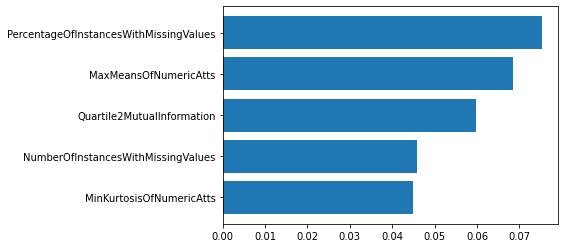

In [35]:
import matplotlib.pyplot as plt

tpot_model = ml_models['TPOT'].get('model').model
feature_names_in = tpot_model.estimator.feature_names_in_
feature_importances = tpot_model.estimator.feature_importances_
sorted_idx = feature_importances.argsort()[-5:]
fig, ax = plt.subplots()
ax.barh(
  feature_names_in[sorted_idx],
  feature_importances[sorted_idx]
)
plt.savefig('graphs/feature-importances/TPOT-features.png', dpi=300, bbox_inches="tight")

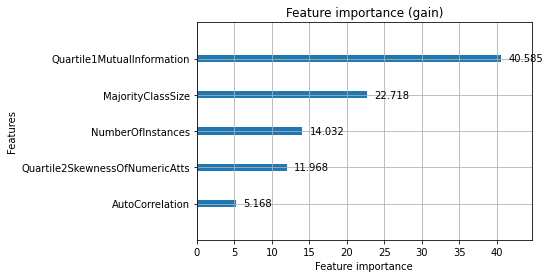

In [36]:
import matplotlib.pyplot as plt
import lightgbm as lgb

sklearn_model = ml_models['auto-sklearn'].get('model').model
importance_type = 'gain'
lgb.plot_importance(sklearn_model.estimator, max_num_features=5, importance_type=importance_type, title='Feature importance ({})'.format(importance_type))
plt.savefig('graphs/feature-importances/auto-sklearn-features.png', dpi=300, bbox_inches="tight")

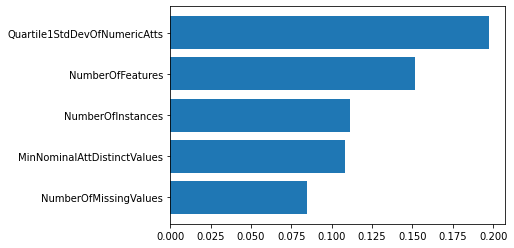

In [37]:
import matplotlib.pyplot as plt

hyperopt_model = ml_models['Hyperopt-Sklearn'].get('model').model
feature_names_in = hyperopt_model.estimator.feature_names_in_
feature_importances = hyperopt_model.estimator.feature_importances_
sorted_idx = feature_importances.argsort()[-5:]
fig, ax = plt.subplots()
ax.barh(
  feature_names_in[sorted_idx],
  feature_importances[sorted_idx]
)
plt.savefig('graphs/feature-importances/Hyperopt-Sklearn-features.png', dpi=300, bbox_inches="tight")

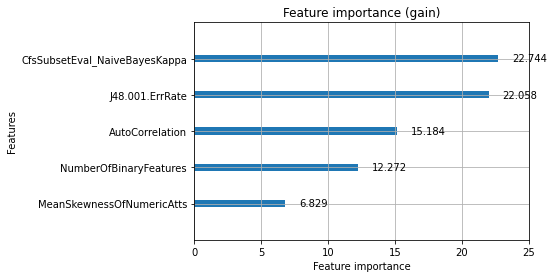

In [38]:
import matplotlib.pyplot as plt
import lightgbm as lgb

h20_model = ml_models['H2O AutoML'].get('model').model
importance_type = 'gain'
lgb.plot_importance(h20_model.estimator, max_num_features=5, importance_type=importance_type, title='Feature importance ({})'.format(importance_type))
plt.savefig('graphs/feature-importances/H2O AutoML-features.png', dpi=300, bbox_inches="tight")

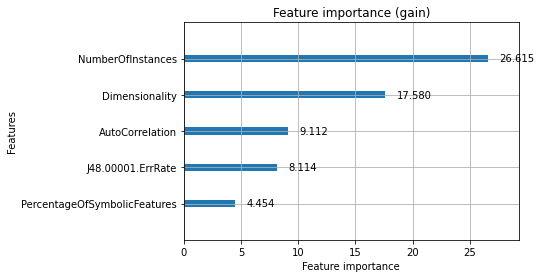

In [39]:
import matplotlib.pyplot as plt
import lightgbm as lgb

flaml_model = ml_models['FLAML'].get('model').model
importance_type = 'gain'
lgb.plot_importance(flaml_model.estimator, max_num_features=5, importance_type=importance_type, title='Feature importance ({})'.format(importance_type))
plt.savefig('graphs/feature-importances/flaml-features.png', dpi=300, bbox_inches="tight")

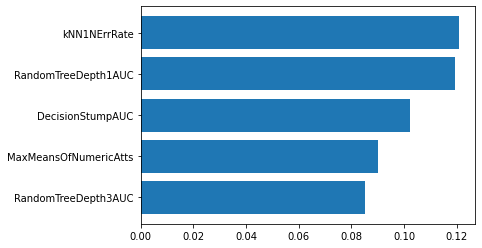

In [40]:
import matplotlib.pyplot as plt

autoGluon_model = ml_models['AutoGluon'].get('model').model
feature_names_in = autoGluon_model.estimator.feature_names_in_
feature_importances = autoGluon_model.estimator.feature_importances_
sorted_idx = feature_importances.argsort()[-5:]
fig, ax = plt.subplots()
ax.barh(
  feature_names_in[sorted_idx],
  feature_importances[sorted_idx]
)
plt.savefig('graphs/feature-importances/autoGluon-features.png', dpi=300, bbox_inches="tight")

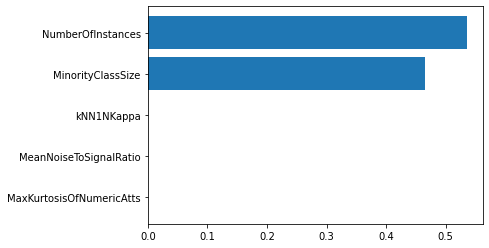

In [41]:
import matplotlib.pyplot as plt

ATM_model = ml_models['ATM'].get('model')
feature_importances = ATM_model.model.estimator.feature_importances_
sorted_idx = feature_importances.argsort()[-5:]
fig, ax = plt.subplots()
ax.barh(
  feature_names_in[sorted_idx],
  feature_importances[sorted_idx]
)
plt.savefig('graphs/feature-importances/ATM-features.png', dpi=300, bbox_inches="tight")

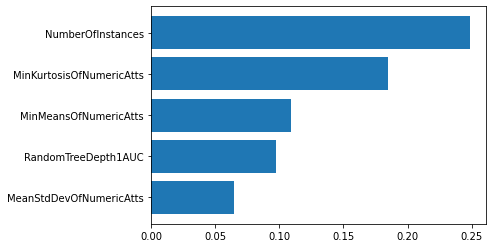

In [42]:
import matplotlib.pyplot as plt

TransmogrifAI_model = ml_models['TransmogrifAI'].get('model')
feature_names_in = TransmogrifAI_model.model.estimator.feature_names_in_
feature_importances = TransmogrifAI_model.model.estimator.feature_importances_
sorted_idx = feature_importances.argsort()[-5:]
fig, ax = plt.subplots()
ax.barh(
  feature_names_in[sorted_idx],
  feature_importances[sorted_idx]
)
plt.savefig('graphs/feature-importances/TransmogrifAI-features.png', dpi=300, bbox_inches="tight")

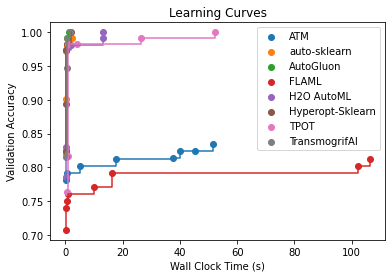

In [34]:
from cProfile import label
from flaml.data import get_output_from_log
import matplotlib.pyplot as plt
import numpy as np

logs = [
'ATM-data.csv2022-09-09 19:02:59.228622.log',
'auto-sklearn-data.csv2022-09-09 18:52:58.964856.log',
'AutoGluon-data.csv2022-09-09 19:00:59.162002.log',
'FLAML-data.csv2022-09-09 18:58:59.078054.log',
'H2O AutoML-data.csv2022-09-09 18:56:59.124596.log',
'Hyperopt-Sklearn-data.csv2022-09-09 18:54:59.051468.log',
'TPOT-data.csv2022-09-09 18:50:58.856981.log',
'TransmogrifAI-data.csv2022-09-09 19:04:59.343437.log']

for log in logs:
    time_history, best_valid_loss_history, valid_loss_history, config_history, metric_history = \
    get_output_from_log(filename='logs/' + log, time_budget=60*2)
    plt.scatter(time_history, 1 - np.array(valid_loss_history), label=log[0:-39])
    plt.step(time_history, 1 - np.array(best_valid_loss_history), where='post')

plt.title('Learning Curves')
plt.xlabel('Wall Clock Time (s)')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.savefig('graphs/learning-curves.png', dpi=300)